In [9]:
import numpy as np 
import pandas as pd 
import edhec_risk_kit as erk 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
%load_ext autoreload 
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\fetet\OneDrive\Documentos\Estudos\RiskManagement\Introduction_to_Portfolio_Construction_and _Analysis_with_Python\Week4\edhec_risk_kit.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
C:\Users\fetet\OneDrive\Documentos\Estudos\RiskManagement\Introduction_to_Portfolio_Construction_and _Analysis_with_Python\Week4\edhec_risk_kit.py:39: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
C:\Users\fetet\OneDrive\Documentos\Estudos\RiskManagement\Introduction_to_Portfolio_Construction_and _Analysis_with_Python\Week4\edhec_risk_kit.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [6]:
n_scenarios = 5000
rates, zc_prices = erk.cir(10, n_scenarios=n_scenarios,
                          b=0.03, r_0=0.03, sigma=0.02)
price_eq = erk.gbm(10, n_scenarios=n_scenarios, mu=0.07, sigma=0.15)

In [8]:
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator=erk.fixedmix_allocator,
                       w1 =0.7)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
          erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
          erk.terminal_stats(rets_7030b, name="70/30",floor=0.75)], 
          axis=1).round(2)
         

,ZC,Eq,70/30
mean,1.34,1.98,1.76
std,0.00,1.02,0.61
p_breach,NaN,0.03,0.01
e_short,NaN,0.11,0.07
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [13]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator,
                          floor=.75, zc_prices=zc_prices[1:])
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
          erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
          erk.terminal_stats(rets_7030b, name="70/30",floor=0.75),
          erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75)], 
          axis=1).round(2)

,ZC,Eq,70/30,Floor75
mean,1.34,1.98,1.76,1.96
std,0.00,1.02,0.61,1.03
p_breach,NaN,0.03,0.01,NaN
e_short,NaN,0.11,0.07,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [19]:
rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator,
                          floor=.75, zc_prices=zc_prices[1:], m=1)

rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator,
                          floor=.75, zc_prices=zc_prices[1:], m=5)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
          erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
          erk.terminal_stats(rets_7030b, name="70/30",floor=0.75),
          erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
          erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75)],
          axis=1).round(4)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5
mean,1.3433,1.9822,1.7635,1.9578,1.6274,1.9672
std,0.0000,1.0195,0.6105,1.0266,0.4499,1.0288
p_breach,NaN,0.0338,0.0072,NaN,NaN,NaN
e_short,NaN,0.1125,0.0723,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


# Risk Budgeting with Drawdown Constraints

In [26]:
cashrate = 0.02
monthly_cashreturn = (1+0.02)**(1/12)-1
rets_cash = pd.DataFrame(data= monthly_cashreturn, index= rets_eq.index, 
                        columns=rets_eq.columns)
rets_maxdd25 = erk.bt_mix(rets_eq, rets_cash, allocator=erk.drawdown_allocator,
                         maxdd=.25)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)

pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
          erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
          erk.terminal_stats(rets_7030b, name="70/30",floor=0.75),
          erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
          erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
          erk.terminal_stats(rets_maxdd25, name="dd25", floor=0.75)],
          axis=1).round(4)


,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5,dd25
mean,1.3433,1.9822,1.7635,1.9578,1.6274,1.9672,1.6362
std,0.0000,1.0195,0.6105,1.0266,0.4499,1.0288,0.5590
p_breach,NaN,0.0338,0.0072,NaN,NaN,NaN,NaN
e_short,NaN,0.1125,0.0723,NaN,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].head()

0   -0.198644
1   -0.176026
2   -0.187505
3   -0.149844
4   -0.126611
Name: Max Drawdown, dtype: float64

In [28]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].min()

-0.23389347858703052

In [ ]:
#PLot 
plt.figure(figsize=(12,6))
sns.distplot(tbv)

# Drawdown constraint with Historical Data

<AxesSubplot:>

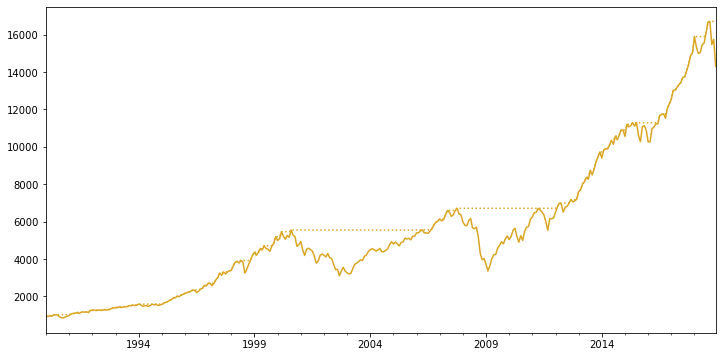

In [30]:
rets_tmi = erk.get_total_market_index_returns()["1990":]
dd_tmi = erk.drawdown(rets_tmi)
ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls='-', color='goldenrod')
dd_tmi["Previous Peak"].plot(ax=ax, ls=":", color="goldenrod")

<AxesSubplot:>

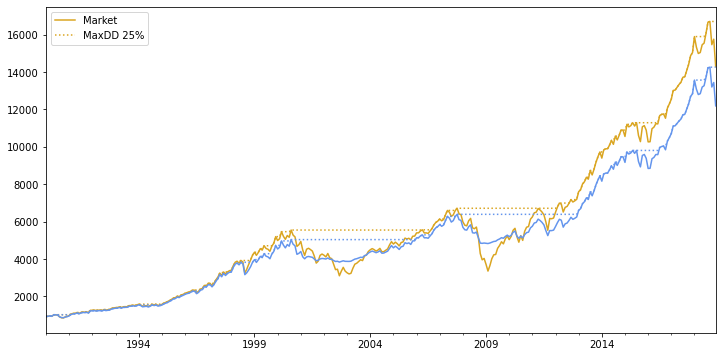

In [32]:
cashrate = 0.03
monthly_cashreturn =(1+cashrate)**(1/12)-1
rets_cash = pd.DataFrame(data = monthly_cashreturn, index= rets_tmi.index,
                        columns=[0])
rets_maxdd25 = erk.bt_mix(pd.DataFrame(rets_tmi), rets_cash,
                         allocator=erk.drawdown_allocator, 
                         maxdd=.25, m=5)
dd_25 = erk.drawdown(rets_maxdd25[0])

ax =dd_tmi["Wealth"].plot(figsize=(12, 6), ls='-', color="goldenrod", 
                          label="Market", legend=True)
dd_tmi["Previous Peak"].plot(ax=ax, ls=':', color = "goldenrod")

dd_25["Wealth"].plot(ax=ax, label="MaxDD 25%", color="cornflowerblue",
                   legend=True)
dd_25["Previous Peak"].plot(ax=ax, color="cornflowerblue", ls=':')